<a href="https://www.kaggle.com/code/uzairajokhio/california-housing-prices?scriptVersionId=215309318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import urllib
import os
import tarfile
%matplotlib inline  
import matplotlib.pyplot as plt

# Download The Data

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url, housing_path):
    """
    The function  creates a datasets/housing directory inworkspace,
        downloads the housing.tgz file, 
        and extracts the housing.csv file from
        it in this directory.
    """
    
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [5]:
def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data(HOUSING_PATH)

# EDA

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


***total_bedrooms attribute has 207 missing values***

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


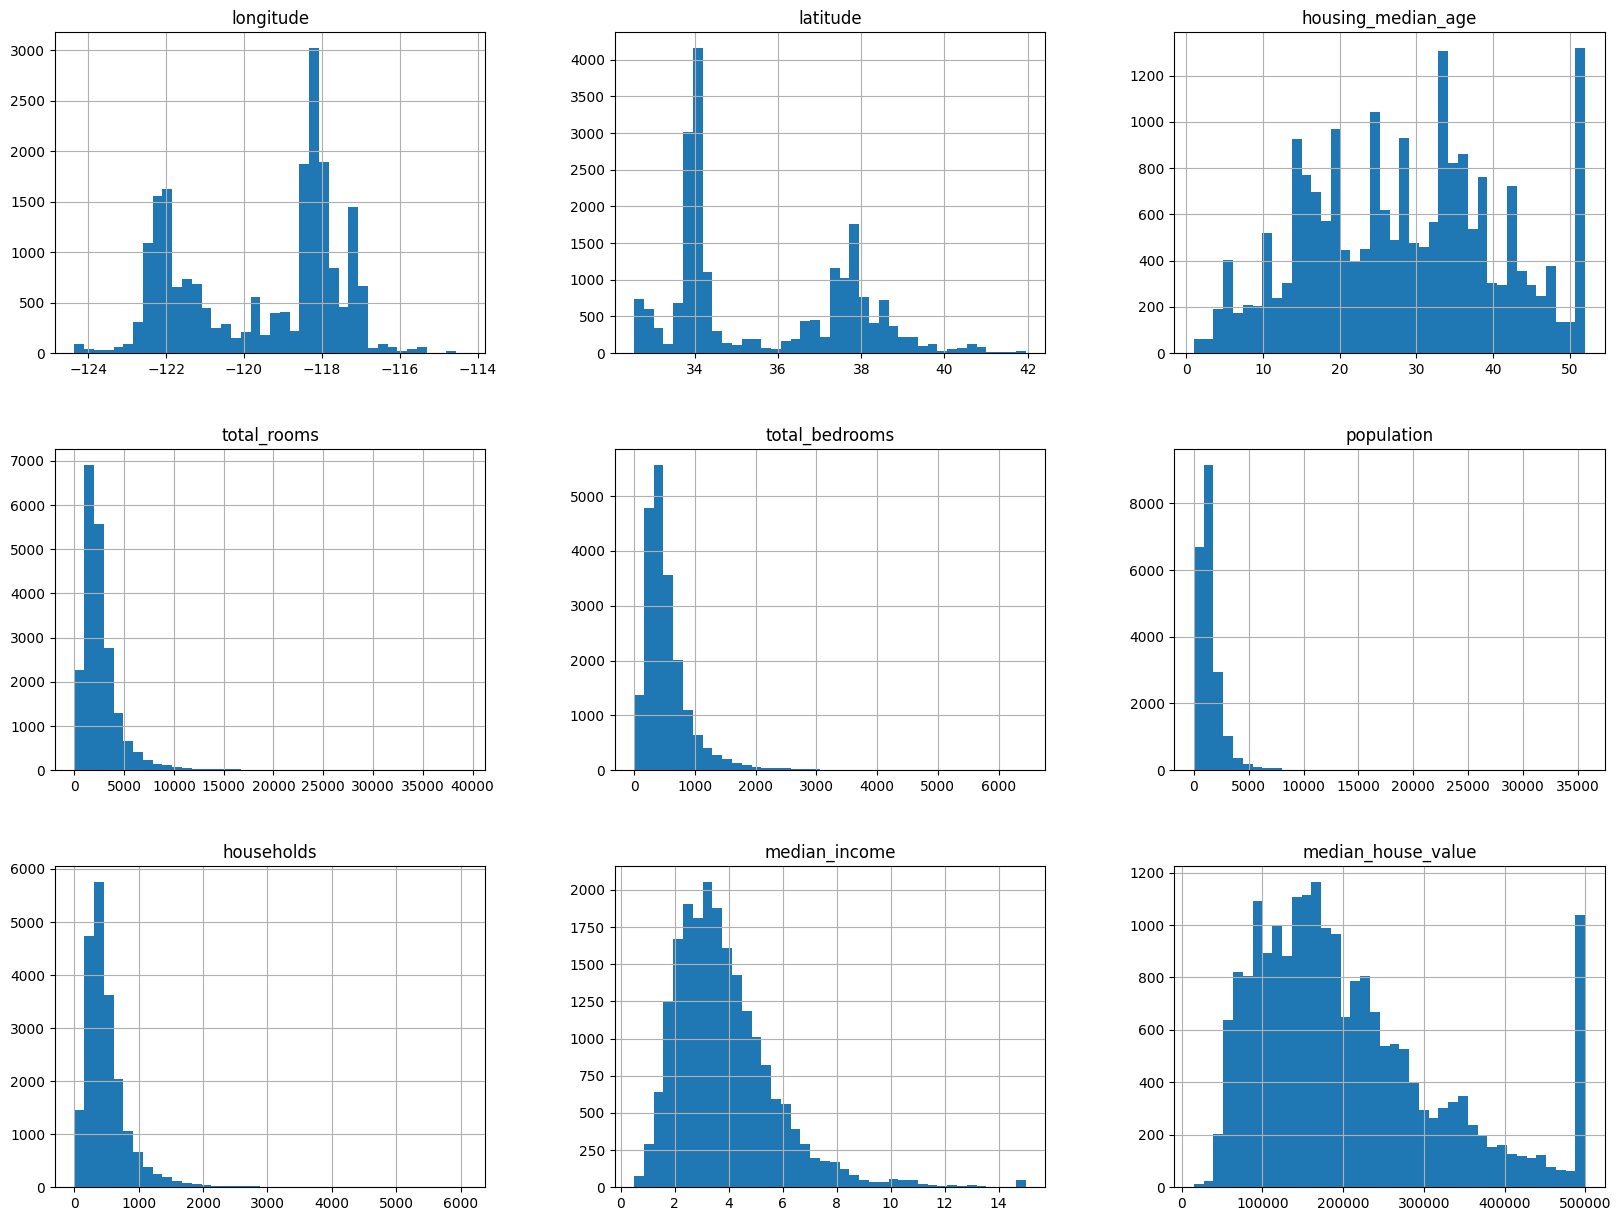

In [10]:
housing.hist(bins=40, figsize=(20,15))
plt.show()

### Observations

1. The medain_inome is not expressed in dollar look like the data has been scaled and capped
2. housing_median_age and median_house_value are also very capped. this may be a issue since it is out target value. ML algorithms may learn that prices never go beyond that limit.
3. These attributes have very different scales.
4. Many histogram are *tail-heavy*, They extend much further to the right then to the left,This may make it a bit harder for some ML algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions

## Create a Test set

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=.2, random_state=47)


**we have considered purely random sampling methods. This is generally fine ifyour dataset is large enough**
 (especially relative to the number of attributes),
**but if it is not, you run the risk of introducing a significant**
 *sampling bias*. 

we will do *stratified sampling* the population is divided into homogeneous subgroups called strata, and the right
number of instances are sampled from each stratum to guarantee that the test set is
representative of the overall population.

the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.

 most median income values are clustered around 1.5 to 6 (i.e.,
$15,000 – $60,000)


**the following code uses thepd.cut() function to create an income category attribute with five categories (labeledfrom 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from1.5 to 3, and so on:**



In [12]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])

<Axes: >

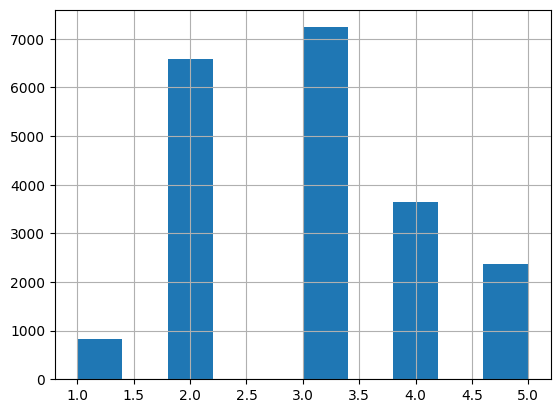

In [13]:
housing['income_cat'].hist()


Now we are ready to do stratified sampling based on the income category. For this
you can use Scikit-Learn’s StratifiedShuffleSplit class

## Stratified split set

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=47)

for train_index, test_index in sss.split(housing, housing['income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

### Random split set

In [15]:
ran_train, ran_test = train_test_split(housing, test_size=0.2, random_state=47)

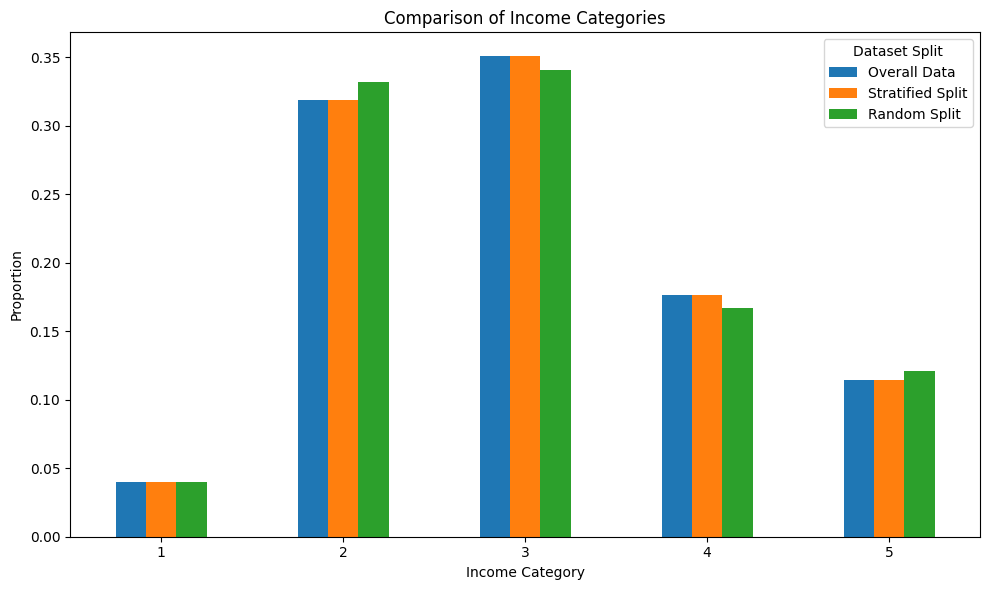

In [16]:
overall = housing['income_cat'].value_counts() / len(housing)
stratified = strat_test_set['income_cat'].value_counts() / len(strat_test_set)
random = ran_test['income_cat'].value_counts() / len(ran_test)

comparison_df = pd.DataFrame({
    'Overall Data': overall,
    'Stratified Split': stratified,
    'Random Split': random
}).sort_index()

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Income Categories")
plt.xlabel("Income Category")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Dataset Split")
plt.tight_layout()
plt.show()

As you can see, the test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is skewed.

Now removing the income_cat attribute so the data is back to its original
state

In [17]:
# now dropping the income_cat 

for set_ in (strat_train_set, strat_test_set):
    set_.drop(['income_cat'], axis=1, inplace=True)

<ipython-input-17-f4cfca43f2f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(['income_cat'], axis=1, inplace=True)
<ipython-input-17-f4cfca43f2f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(['income_cat'], axis=1, inplace=True)


# Discover and Visualize the Data to Gain Insight

First, make sure you have put the test set aside and you are only exploring the train‐
ing set. Also, if the training set is very large, you may want to sample an exploration
set, to make manipulations easy and fast. In our case, the set is quite small, so you can
just work directly on the full set. Let’s create a copy so that you can play with it
without harming the training set:

In [18]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

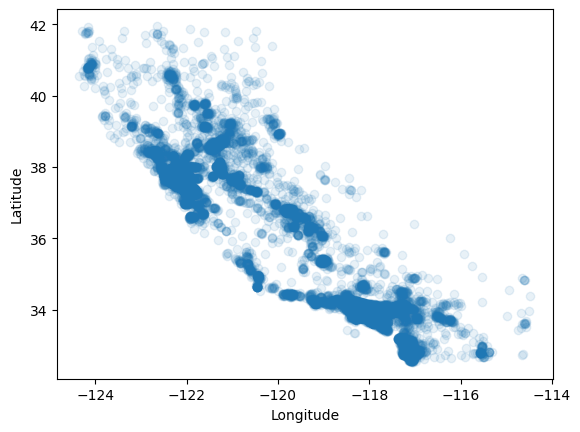

In [19]:
plt.scatter(x='longitude', y='latitude', data=housing, alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel("Latitude")
plt.show()


Now that’s much better: you can clearly see the high-density areas, namely the Bay
Area and around Los Angeles and San Diego, plus a long line of fairly high density in
the Central Valley, in particular around Sacramento and Fresno.

let’s look at the housing prices 

The radius of each circle represents the district’s population (option s),

the color represents the price (option c). 

We will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):

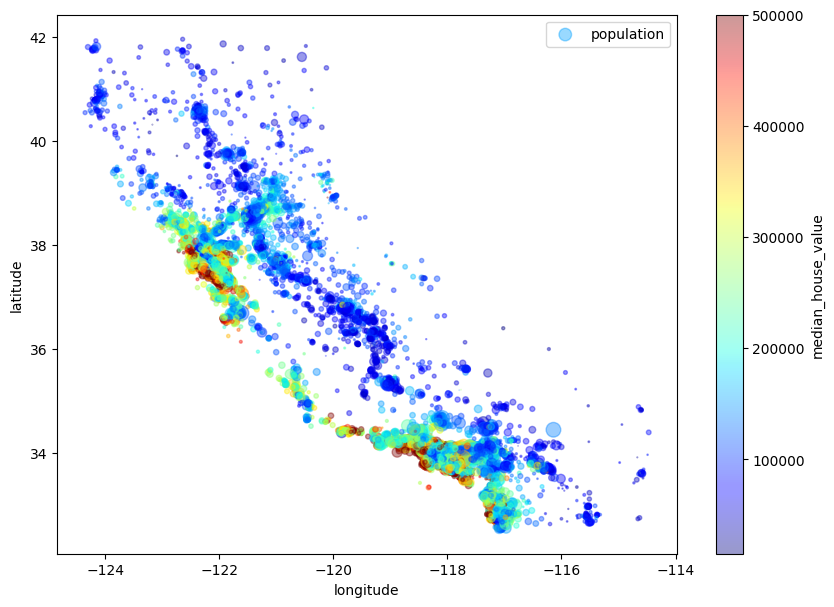

In [20]:
housing.plot(x='longitude',
            y='latitude', 
            kind='scatter', 
            alpha=.4, 
            s=housing['population']/100, 
            label='population',
            figsize=(10,7),
            c='median_house_value',
            cmap=plt.get_cmap('jet'),
            colorbar=True,
           )
plt.legend()
plt.show()

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density,

## looking for Correlation

In [21]:
house_corr = housing.drop('ocean_proximity', axis=1)
corr_matrix = house_corr.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.685047
total_rooms           0.133967
housing_median_age    0.098855
households            0.065643
total_bedrooms        0.049293
population           -0.025323
longitude            -0.040245
latitude             -0.150690
Name: median_house_value, dtype: float64


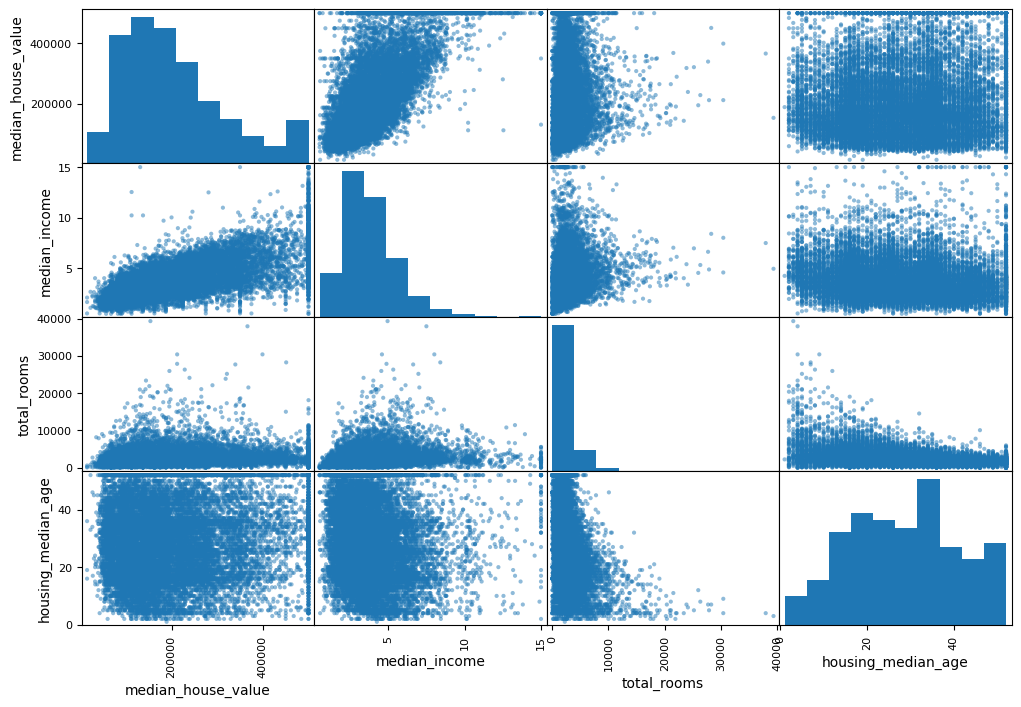

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

there is a high correlation between median_income and median_house_value

<Axes: xlabel='median_income', ylabel='median_house_value'>

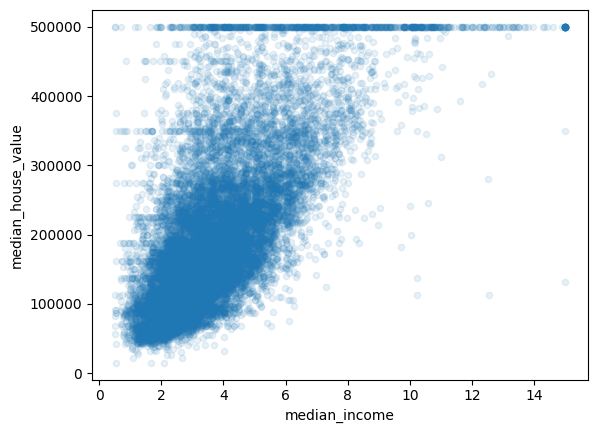

In [23]:
housing.plot(kind='scatter',y='median_house_value', x="median_income", alpha=0.1)

# Experimenting with Attribute Combinations

In [24]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [25]:
house_corr = housing.drop('ocean_proximity', axis=1)
corr_matrix = house_corr.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.685047
rooms_per_household         0.147328
total_rooms                 0.133967
housing_median_age          0.098855
households                  0.065643
total_bedrooms              0.049293
population_per_household   -0.022270
population                 -0.025323
longitude                  -0.040245
latitude                   -0.150690
bedrooms_per_room          -0.253836
Name: median_house_value, dtype: float64


The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

# Prepare the Data for Machine Learning Algorithms

first let’s revert to a clean training set (by copying strat_train_set once again).
Let’s also separate the predictors and the labels, since we don’t necessarily want to
apply the same transformations to the predictors and the target values

In [26]:
housing = strat_train_set.drop(['median_house_value'], axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Data Cleaning 

In [27]:
median = housing["total_bedrooms"].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [28]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attribute

In [30]:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.49      34.26      29.      2131.       436.      1168.
  410.         3.53635]
[-118.49      34.26      29.      2131.       436.      1168.
  410.         3.53635]


In [31]:
X = imputer.transform(housing_num)

## Handling Text and Categorical Attributes

In [32]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
7057,<1H OCEAN
13076,INLAND
6547,<1H OCEAN
15642,NEAR BAY
4207,<1H OCEAN


In [33]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obvi‐
ously not the case for the ocean_proximity column (for example, categories 0 and 4
are clearly more similar than categories 0 and 1).

so we will do one hot encoding because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
The new attributes are sometimes called dummy attributes

In [34]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn func‐
tionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inher‐
itance), all you need to do is create a class and implement three methods: fit()
(returning self), transform(), and fit_transform()


You can get the last one for free by simply adding TransformerMixin as a base class.
If you add BaseEstimator as a base class (and avoid *args and **kargs in your con‐
structor), you will also get two extra methods (get_params() and set_params()) that
will be useful for automatic hyperparameter tuning.

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_index, bedrooms_index, population_index, household_index = 3,4,5,6

class CombinedAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self,X, y=None):
        return self 

    def transform(self, X):
        rooms_per_household = X[:,rooms_index] / X[:,household_index]
        population_per_household = X[:,population_index] / X[:,household_index]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_index] / X[:,rooms_index]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            np.c_[X,rooms_per_household, population_per_household]


attr_adder = CombinedAttributes(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

## Transformation Pipelines

transforming numerical columns in the dataset

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline = [
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributes()),
    ('std_scaler',StandardScaler()),
           ]

num_pipeline = Pipeline(pipeline)

housing_num_tr = num_pipeline.fit_transform(housing_num)

transforming both categorical column and numerical columns in the dataset

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


full_pipeline = ColumnTransformer([
    # name , pipeline, attributes
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

# Seleting and Training Model

## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [39]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f"Predications: {lin_reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Predications: [215046.13232019  86906.73131695 128391.17422199 257717.23900965
 179350.0932274 ]
Labels: [151900.0, 89600.0, 161700.0, 420000.0, 156300.0]


## evaluating performance

In [40]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, y_pred)
lin_rmse = np.sqrt(lin_mse)

print(f"Root mean Squared error: {round(lin_rmse,2)}")

Root mean Squared error: 68158.52


learly not a great score: most districts’ median_housing_values range between 120,000 and 265,000, so a typical prediction error of 68,628 is not very satisfying. This is an example of a model underfitting the training
data.

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [42]:
y_pred = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, y_pred)
tree_rmse = np.sqrt(tree_mse)

print(f"Root mean Squared error: {round(tree_rmse, 2)}")

Root mean Squared error: 0.0


0 error mean that the model is perfect, or this may highly be the case of overfitting we will do cross validation for further evaluation

## Better Evaluation Using Cross-Validation

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

tree_rsme_score = np.sqrt(-scores)

Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores
before calculating the square root.

In [44]:
def display_score(score):
    print("Scores: ", score)
    print("-"*80)
    print("Mean: ", score.mean())
    print("-"*80)
    print("Std: ", score.std())
    print("-"*80)

In [45]:
display_score(tree_rsme_score)

Scores:  [67695.08823828 68075.67411686 72572.47408766 72645.41663377
 71348.31779894 66130.94294698 72022.70774002 73835.47519493
 69172.44507317 69004.34809406]
--------------------------------------------------------------------------------
Mean:  70250.28899246515
--------------------------------------------------------------------------------
Std:  2434.563707275015
--------------------------------------------------------------------------------


Decision tree is overfitting the data, it seem that the DT is performing worst then Linear regression.

Let’s compute the same scores for the Linear Regression model just to be sure:

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rsme_score = np.sqrt(-scores)

display_score(lin_rsme_score)

Scores:  [66140.43201241 69856.24476037 72991.24342271 68604.20881411
 69331.98909867 63688.80128274 69726.09880476 69445.15749213
 68255.42945694 64893.45660192]
--------------------------------------------------------------------------------
Mean:  68293.30617467653
--------------------------------------------------------------------------------
Std:  2578.086780479289
--------------------------------------------------------------------------------


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.
Let’s try one last model now: the RandomForestRegressor.

## Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [48]:
y_pred = rf_reg.predict(housing_prepared)
rfr_mse = mean_squared_error(housing_labels, y_pred)
rfr_rmse = np.sqrt(rfr_mse)
print(f"Root mean Squared error: {round(rfr_rmse, 2)}")

Root mean Squared error: 18565.63


In [49]:
score = cross_val_score(rf_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')
rf_reg_score = np.sqrt(-score)

display_score(rf_reg_score)

Scores:  [47006.24607211 47269.39213421 51841.52666309 49894.17609716
 53605.15927381 48732.41237985 50609.01149529 51286.31102147
 49146.52980841 48332.66563255]
--------------------------------------------------------------------------------
Mean:  49772.34305779591
--------------------------------------------------------------------------------
Std:  1985.9703493241775
--------------------------------------------------------------------------------


Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. 

# Fine-Tunning the model 
## Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators':[2,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]}
]

rf_grid = GridSearchCV(rf_reg, params, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

rf_grid.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [2, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
print(f"The best parameter for RandomSearchRegressor is {rf_grid.best_params_}")
print(rf_grid.best_estimator_)

The best parameter for RandomSearchRegressor is {'max_features': 8, 'n_estimators': 30}
RandomForestRegressor(max_features=8, n_estimators=30)


In [52]:
cv_result = rf_grid.cv_results_

for mean_score, param in zip(cv_result['mean_test_score'], cv_result['params']):
    mean = np.sqrt(-mean_score)
    print(mean, param)

68812.27589743635 {'max_features': 2, 'n_estimators': 2}
54858.07315057315 {'max_features': 2, 'n_estimators': 10}
52460.75306268858 {'max_features': 2, 'n_estimators': 30}
63979.37360737947 {'max_features': 4, 'n_estimators': 2}
52393.95063151625 {'max_features': 4, 'n_estimators': 10}
49994.848198795764 {'max_features': 4, 'n_estimators': 30}
64070.697227894234 {'max_features': 6, 'n_estimators': 2}
51423.161558201966 {'max_features': 6, 'n_estimators': 10}
49759.02937585048 {'max_features': 6, 'n_estimators': 30}
61130.31225513708 {'max_features': 8, 'n_estimators': 2}
51920.91845095812 {'max_features': 8, 'n_estimators': 10}
49578.173896116976 {'max_features': 8, 'n_estimators': 30}
62130.89534676416 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53417.61616252069 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59391.803373345996 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52269.928044277236 {'bootstrap': False, 'max_features': 3, 'n_estimator

# Evaluate the test set

In [53]:
final_model = rf_grid.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [54]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

print("Root Mean Squared Error: ", final_rmse)

Root Mean Squared Error:  49955.31553991407


# Saving the model

In [55]:
from joblib import dump

dump(final_model, "housing_predicator_RandomForestRegressor.joblib")
print("Model Saved!!")

Model Saved!!
